## **Lab 9 - KNN Classification**
### S Kailash 18MIS1074 
### SWE4012 Machine Learning (L11+L12)
### Faculty : Dr. M Premlatha
### Date : 15th March 2022

In this experiment, we will be performing KNN classification on two datasets (Iris and social network ads) and see which one performs better.

In [45]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import datasets
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [46]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


[KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9)]
[-681.3706, -152.3479517603579, -78.85144142614601, -57.25600931571815, -46.44618205128205, -39.21125347985348, -34.3058152958153, -30.186555194805194, -27.984873433583964]


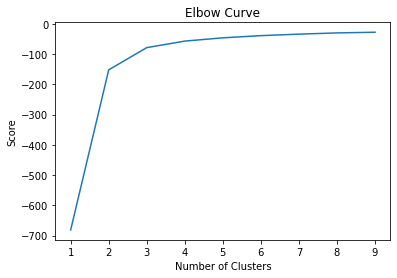

In [48]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
print(kmeans)
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
print(score)
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [49]:
model = KMeans(n_clusters = 3)
model.fit(df)

KMeans(n_clusters=3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


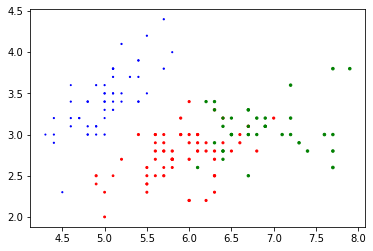

In [50]:
print(model.labels_)
colormap = np.array(['Red', 'Blue', 'Green'])
z = plt.scatter(df.sepal_length, df.sepal_width, df.petal_length, c = colormap[model.labels_])

In [51]:
accuracy_score(iris.target,model.labels_)

0.24

In [52]:
df.insert(4,"class",model.labels_)
df.replace({'class': {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}})

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-versicolor
4,5.0,3.6,1.4,0.2,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [53]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy score",accuracy_score(y_test,y_pred))

[[15  0  0]
 [ 0  9  0]
 [ 1  0  5]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      1.00      1.00         9
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy score 0.9666666666666667


As we can see, KNN performs with an accuracy of ~97% for Iris dataset. Let us see how it holds up for the other dataset - the social network ads dataset

In [56]:
dataset=pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [58]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
y_pred = classifier.predict(X_test)

In [61]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(cm)
print("Accuracy",ac)

[[55  3]
 [ 1 21]]
Accuracy 0.95


As we can see, the KNN model perfomed with an accuracy of 95% for the Social Network Ads dataset, compared to 96.7% accuracy of the Iris dataset.
We can state KNN is marginally better for the Iris dataset.
Thank You!